In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_process(initial_population, generations, mu, alpha):
    y = np.zeros((generations, len(initial_population)))
    long_term_average = np.zeros(len(initial_population))
    
    y[0, :] = initial_population

    for j in range(1, generations):
        for i in range(len(initial_population)):
            lambda_param = mu * (initial_population[i] / mu)**(1-alpha)
            Z = np.random.poisson(lambda_param)
            y[j, i] = y[j-1, i] / np.sum(np.random.poisson(lambda_param, len(initial_population)))

        long_term_average += y[j, :]

    long_term_average /= generations

    return y, long_term_average


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_process(initial_population, generations, mu, alpha):
    y = np.zeros((generations, len(initial_population)))
    long_term_average = np.zeros(len(initial_population))
    
    y[0, :] = initial_population

    for j in range(1, generations):
        for i in range(len(initial_population)):
            lambda_param = (mu * y[j-1, i]**(1-alpha))
            Z = np.random.poisson(lambda_param)
            y[j, i] = (y[j-1, i] / np.sum(np.random.poisson(lambda_param, len(initial_population))))

        long_term_average += y[j, :]

    long_term_average /= generations

    return y, long_term_average

# Set parameters
initial_population = np.array([50])
generations = 50
mu = 30
alpha_values = [-0.1, -0.5, -1]

# Plot sample paths for different values of alpha
plt.figure(figsize=(10, 8))

for alpha in alpha_values:
    y, long_term_average = simulate_process(initial_population, generations, mu, alpha)
    for i in range(len(initial_population)):
        plt.subplot(len(alpha_values), 1, alpha_values.index(alpha) + 1)
        plt.plot(range(1, generations + 1), y[:, i], label=f'Population {i+1}')
        plt.plot(range(1, generations + 1), long_term_average[i] * np.ones(generations), '--', label=f'Long-term Average {i+1}')
        plt.title(f'Sample Paths and Long-term Average for alpha = {alpha}')
        plt.xlabel('Generation')
        plt.ylabel('Population')
        plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

# Set parameters
initial_population = np.array([100, 150, 200])
generations = 50
mu = 1
alpha_values = [-0.1, -0.5, -1]

# Plot sample paths for different values of alpha
plt.figure(figsize=(10, 8))

for alpha in alpha_values:
    y, long_term_average = simulate_process(initial_population, generations, mu, alpha)
    for i in range(len(initial_population)):
        plt.subplot(len(alpha_values), 1, alpha_values.index(alpha) + 1)
        plt.plot(range(1, generations + 1), y[:, i], label=f'Population {i+1}')
        plt.plot(range(1, generations + 1), long_term_average[i] * np.ones(generations), '--', label=f'Long-term Average {i+1}')
        plt.title(f'Sample Paths and Long-term Average for alpha = {alpha}')
        plt.xlabel('Generation')
        plt.ylabel('Population')
        plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def simulate_process(initial_population, generations, mu, )

In [ ]:
def lamda_ij_pre(y_ij_pre, alpha):
    return (mu /y_ij_pre) ** (1 - alpha)

In [ ]:
def z_k(y_ij_pre):
    return np.random.poisson(lamda_ij_pre(y_ij_pre, alpha),y_ij_pre)

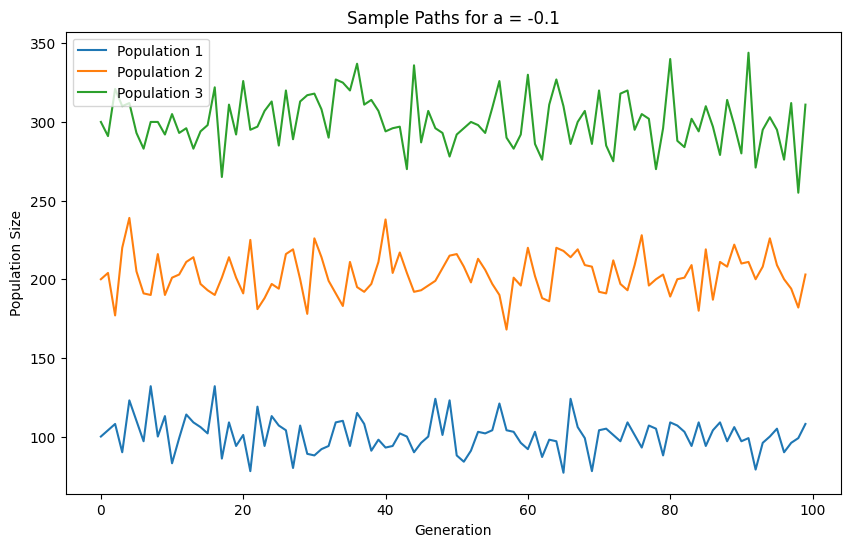

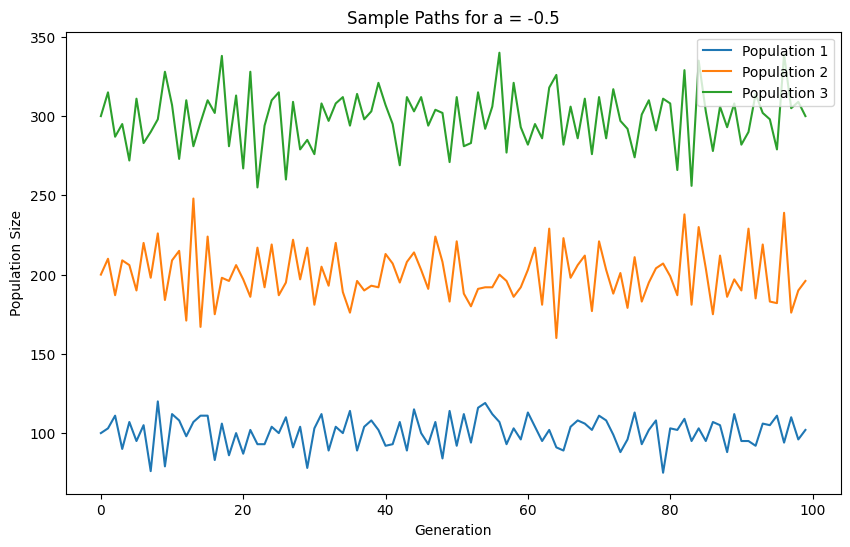

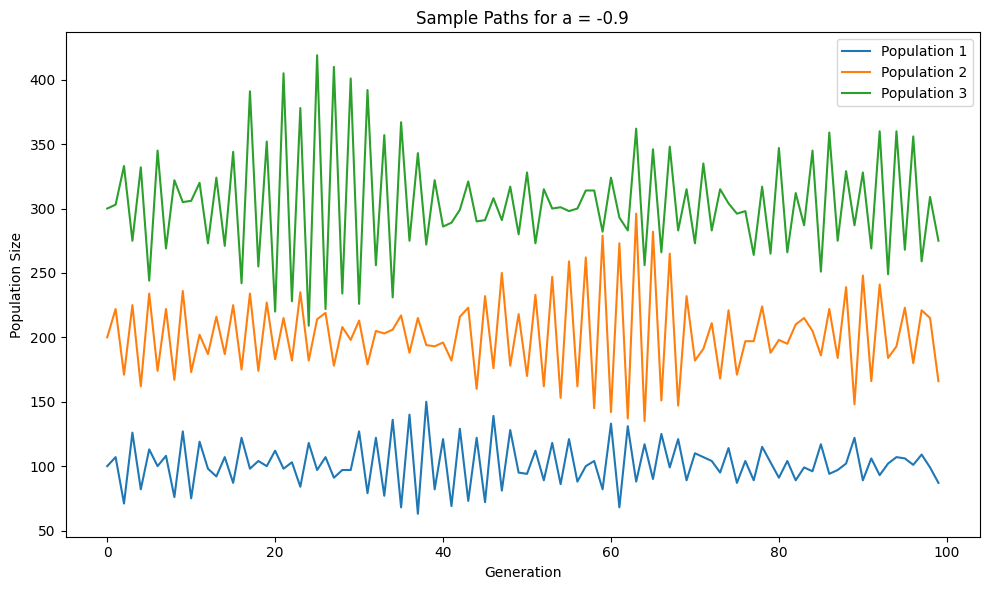

In [ ]:


# Function to calculate μcij
def calculate_mu_cij(yij_prev, mu, alpha):
    return mu * (yij_prev / mu) ** alpha

# Function to generate sample paths
def generate_sample_paths(initial_values, mu, alpha):
    sample_paths = np.zeros((num_populations, num_generations))
    sample_paths[:, 0] = initial_values
    
    for i in range(1, num_generations):
        for j in range(num_populations):
            # yij_prev = 100
            yij_prev = sample_paths[j, i-1] 
            # if i > 1 else 1  # Setting initial value to 1
            Zk = np.random.poisson(calculate_mu_cij(yij_prev, mu[j], alpha), size=1)
            yij = yij_prev * np.sum(Zk) / yij_prev
            sample_paths[j, i] = yij
    
    return sample_paths



def simulate_population(initial_values, mu, alpha):

    # Generate sample paths
    sample_paths = generate_sample_paths(initial_values, mu, alpha)
    avg_level = np.average(sample_paths)

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(num_populations):
        plt.plot(sample_paths[i, :], label=f'Population {i + 1}')

    # Plotting the long-term average level
    # avg_level = mu ** (1 / (1 - alpha))
    # plt.axhline(y=avg_level, color='r', linestyle='--', label='Long-term Average Level')

    plt.title(f'Sample Paths for a = {alpha}')
    plt.xlabel('Generation')
    plt.ylabel('Population Size')
    plt.legend()

    # return sample_paths, avg_level


# Parameters
# mu = 30 # Parameter μ
# alpha = -0.1  
num_populations = 3  # Number of populations
num_generations = 100  # Number of generations

# Set initial values
initial_values = np.array([100, 200, 300])
mu = initial_values

# Parameter α
alpha_values = [-0.1,-0.5,-.9]

for alpha in alpha_values:
    simulate_population(initial_values, mu, alpha)


plt.tight_layout()
plt.show()
